Mean Squared Error (MSE) on test set: 0.0000
R² score on test set: 1.0000


/opt/anaconda3/lib/python3.12/site-packages/sklearn/gaussian_process/_gpr.py:663: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)


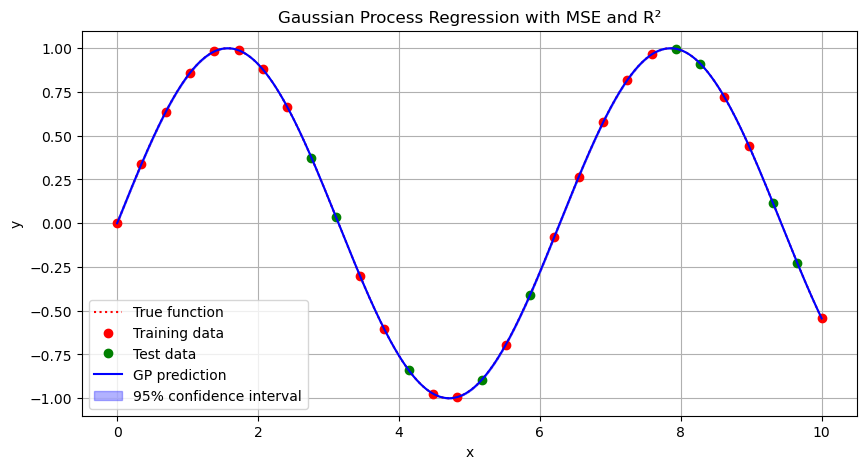

In [2]:
# Kriging - Gaussian process regression as a interpolation method with covariance function(as a kernel).

import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, ConstantKernel as C
from sklearn.metrics import mean_squared_error, r2_score

# Example true function: something smooth and nonlinear
def true_function(x):
    return np.sin(x)

# Generate full dataset
X_full = np.atleast_2d(np.linspace(0, 10, 30)).T
y_full = true_function(X_full).ravel()

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_full, y_full, test_size=0.3, random_state=42)

# Define the kernel
kernel = C(1.0) * RBF(length_scale=1.0)

# Create and train the model
gp = GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer=10)
gp.fit(X_train, y_train)

# Predictions
X_pred = np.atleast_2d(np.linspace(0, 10, 1000)).T
y_pred_plot, sigma = gp.predict(X_pred, return_std=True)

# Prediction on test set
y_pred_test = gp.predict(X_test)

# Compute evaluation metrics
mse = mean_squared_error(y_test, y_pred_test)
r2 = r2_score(y_test, y_pred_test)

# Print results
print(f"Mean Squared Error (MSE) on test set: {mse:.4f}")
print(f"R² score on test set: {r2:.4f}")

# Plotting
plt.figure(figsize=(10, 5))
plt.plot(X_pred, true_function(X_pred), 'r:', label="True function")
plt.plot(X_train, y_train, 'ro', label="Training data")
plt.plot(X_test, y_test, 'go', label="Test data")
plt.plot(X_pred, y_pred_plot, 'b-', label="GP prediction")
plt.fill_between(X_pred.ravel(),
                 y_pred_plot - 1.96 * sigma,
                 y_pred_plot + 1.96 * sigma,
                 alpha=0.3, color='blue', label="95% confidence interval")
plt.legend()
plt.title("Gaussian Process Regression with MSE and R²")
plt.xlabel("x")
plt.ylabel("y")
plt.grid()
plt.show()